In [1]:
#Import all packages
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from scipy import stats

import sklearn
from sklearn import  preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Load the data set into Pandas
df = pd.read_csv('churn_prepared.csv', index_col = 0)
df.describe()

,Churn_num,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Tablet_num,...,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovies_num,One year,Two Year,Fiber Optic,None,Male,Nonbinary
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.265000,2.0877,53.078400,39806.926771,10.001848,0.398000,34.526188,172.624816,3392.341550,0.299100,...,0.438600,0.375000,0.492900,0.489000,0.210200,0.244200,0.440800,0.212900,0.474400,0.023100
std,0.441355,2.1472,20.698882,28199.916702,2.976019,0.635953,26.443063,42.943094,2185.294852,0.457887,...,0.496241,0.484147,0.499975,0.499904,0.407471,0.429633,0.496508,0.409378,0.499369,0.150229
min,0.000000,0.0000,18.000000,348.670000,0.099747,0.000000,1.000259,79.978860,155.506715,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0000,35.000000,19224.717500,8.018214,0.000000,7.917694,139.979239,1236.470827,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.0000,53.000000,33170.605000,10.018560,0.000000,35.430507,167.484700,3279.536903,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.0000,71.000000,53246.170000,11.969485,1.000000,61.479795,200.734725,5586.141370,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,10.0000,89.000000,258900.700000,21.207230,6.000000,71.999280,290.160419,7158.981530,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
#Prepare data for train test split [4][5]
feature = ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Tablet_num', 'Phone_num',
           'Multiple_num', 'OnlineSecurity_num', 'OnlineBackup_num', 'DeviceProtection_num', 'TechSupport_num', 'StreamingTV_num', 'StreamingMovies_num', 'One year',
           'Two Year', 'Fiber Optic', 'None', 'Male', 'Nonbinary']
X = df[feature]
y = df['Churn_num']

In [4]:
#Split the data set with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 25)

In [5]:
#Run logistic regression model and make prediction [4]
model = LogisticRegression(solver = 'liblinear', random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [6]:
y_pred = model.predict(X_test)

In [7]:
#Print out a confusion matrix[4]
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[5203  669]
 [ 787 1341]]


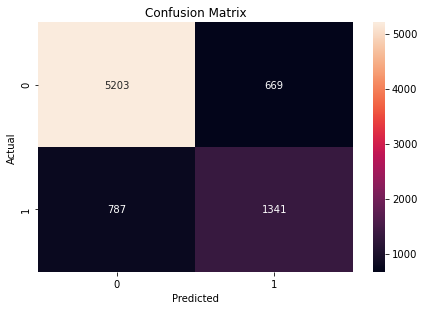

In [8]:
#Use seaborn heatmap to visualize the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, fmt = 'g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
#plt.savefig('matrix1.jpg')

In [9]:
#Display the accuracy, precision and recall of the model
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.818
Precision:  0.6671641791044776
Recall:  0.6301691729323309


In [10]:
#Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5872
           1       0.67      0.63      0.65      2128

    accuracy                           0.82      8000
   macro avg       0.77      0.76      0.76      8000
weighted avg       0.82      0.82      0.82      8000



In [11]:
#Run initial model with logit
initial_model = sm.Logit(y, X).fit()
print(initial_model.summary())

Optimization terminated successfully.
         Current function value: 0.226318
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_num   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9977
Method:                           MLE   Df Model:                           22
Date:                Tue, 22 Feb 2022   Pseudo R-squ.:                  0.6086
Time:                        15:09:55   Log-Likelihood:                -2263.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                 0.4014      0.047      8.626      0.000       0.310       0.493

<AxesSubplot:>

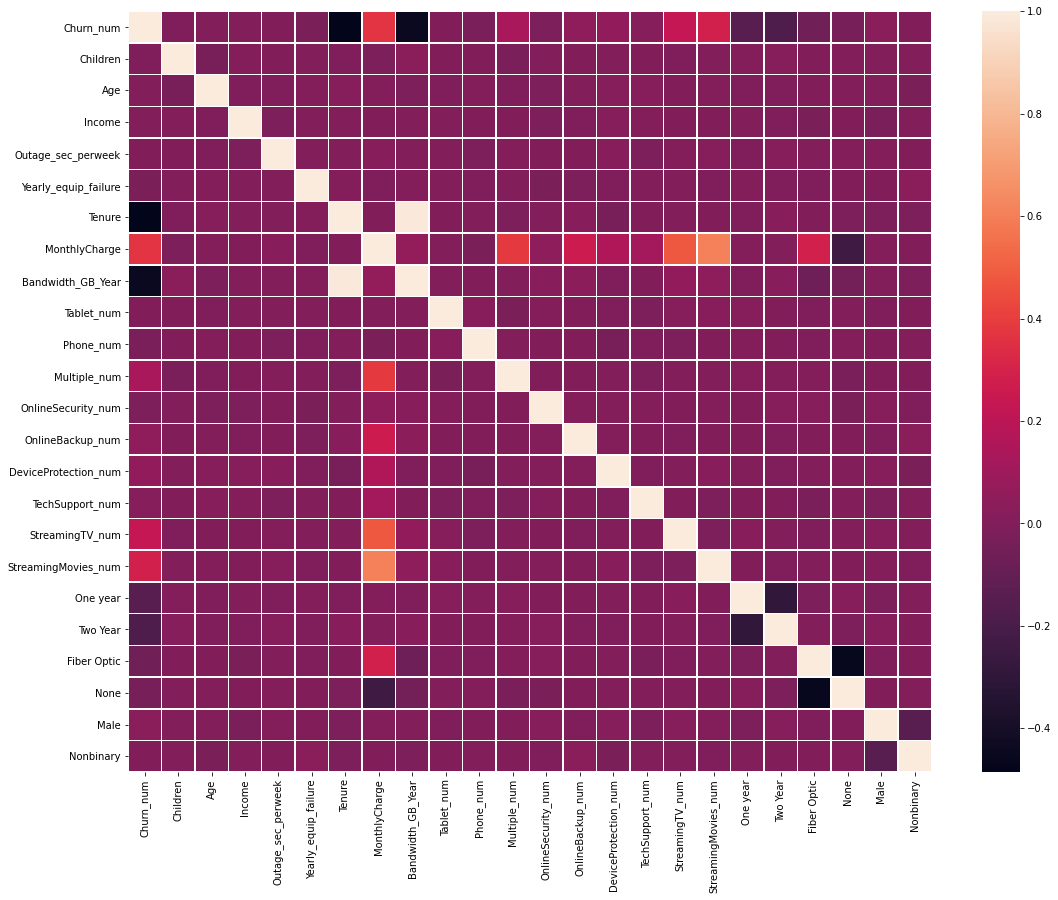

In [12]:
#Create correlation heatmap for better visualization of model reduction and variable selection
plt.figure(figsize = (18, 14))
sns.heatmap(df.corr(), linewidth = 0.5)
#plt.savefig('heatmap.jpg')

In [13]:
#Prepare for reduced model
feature2 = ['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Multiple_num', 'StreamingTV_num', 'StreamingMovies_num', 'One year', 'Two Year']
X2 = df[feature2]
y = df['Churn_num']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.8, random_state = 25)

In [15]:
#Run reduced model and make prediction
model2 = LogisticRegression(solver = 'liblinear', random_state = 0)
model2.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [16]:
y_pred2 = model2.predict(X_test)

In [17]:
#Print out a confusion matrix[4]
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
print(cnf_matrix2)

[[5473  399]
 [ 460 1668]]


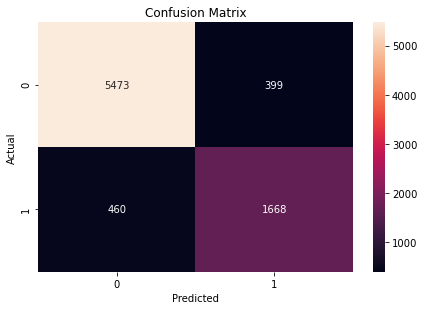

In [18]:
#Use seaborn for better visualization of reduced confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix2), annot = True, fmt = 'g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
#plt.savefig('matrix2.jpg')

In [19]:
#Display the accuracy, precision and recall of the model
print("Accuracy Initial: ", metrics.accuracy_score(y_test, y_pred))
print("Accuracy Reduced: ", metrics.accuracy_score(y_test, y_pred2))
print("")
print("Precision Initial: ", metrics.precision_score(y_test, y_pred))
print("Precision Reduced: ", metrics.precision_score(y_test, y_pred2))
print("")
print("Recall Initial: ", metrics.recall_score(y_test, y_pred))
print("Recall Reduced: ", metrics.recall_score(y_test, y_pred2))

Accuracy Initial:  0.818
Accuracy Reduced:  0.892625

Precision Initial:  0.6671641791044776
Precision Reduced:  0.806966618287373

Recall Initial:  0.6301691729323309
Recall Reduced:  0.7838345864661654


In [20]:
#Print classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      5872
           1       0.81      0.78      0.80      2128

    accuracy                           0.89      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.89      0.89      0.89      8000



In [21]:
#Run reduced model with logit
reduced_model = sm.Logit(y, X2).fit()
print(reduced_model.summary())

Optimization terminated successfully.
         Current function value: 0.250189
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Churn_num   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Tue, 22 Feb 2022   Pseudo R-squ.:                  0.5673
Time:                        15:11:45   Log-Likelihood:                -2501.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Tenure                 -0.2765      0.014    -20.328      0.000      -0.303      -0.250
Mo